In [1]:
from google.colab import files
uploaded = files.upload()


Saving terrorism.csv.csv to terrorism.csv.csv


In [3]:
import pandas as pd

df = pd.read_csv('terrorism.csv.csv', encoding='latin1')
df.shape  # Check dimensions
df.head()  # Preview first few rows


/tmp/ipython-input-3-2446608042.py:3: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('terrorism.csv.csv', encoding='latin1')


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
# Column names
df.columns.tolist()

# Missing values
df.isnull().sum().sort_values(ascending=False).head(15)

# Basic summary
df.describe(include='all')


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
count,1.816910e+05,181691.000000,181691.000000,181691.000000,9239,181691.000000,2220,181691.000000,181691,181691.000000,...,28289,115500,76933,43516,181691,181691.000000,181691.000000,181691.000000,181691.000000,25038
unique,NaN,NaN,NaN,NaN,2244,NaN,1859,NaN,205,NaN,...,15429,83988,62263,36090,26,NaN,NaN,NaN,NaN,14306
top,NaN,NaN,NaN,NaN,"September 18-24, 2016",NaN,8/4/1998,NaN,Iraq,NaN,...,Casualty numbers for this incident conflict ac...,Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...","Christopher Hewitt, ""Political Violence and Te...",START Primary Collection,NaN,NaN,NaN,NaN,"201612010023, 201612010024, 201612010025, 2016..."
freq,NaN,NaN,NaN,NaN,101,NaN,18,NaN,24636,NaN,...,1607,205,134,139,78002,NaN,NaN,NaN,NaN,80
mean,2.002705e+11,2002.638997,6.467277,15.505644,NaN,0.045346,NaN,131.968501,NaN,7.160938,...,NaN,NaN,NaN,NaN,NaN,-4.543731,-4.464398,0.090010,-3.945952,NaN
std,1.325957e+09,13.259430,3.388303,8.814045,NaN,0.208063,NaN,112.414535,NaN,2.933408,...,NaN,NaN,NaN,NaN,NaN,4.543547,4.637152,0.568457,4.691325,NaN
min,1.970000e+11,1970.000000,0.000000,0.000000,NaN,0.000000,NaN,4.000000,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,-9.000000,-9.000000,-9.000000,-9.000000,NaN
25%,1.991021e+11,1991.000000,4.000000,8.000000,NaN,0.000000,NaN,78.000000,NaN,5.000000,...,NaN,NaN,NaN,NaN,NaN,-9.000000,-9.000000,0.000000,-9.000000,NaN
50%,2.009022e+11,2009.000000,6.000000,15.000000,NaN,0.000000,NaN,98.000000,NaN,6.000000,...,NaN,NaN,NaN,NaN,NaN,-9.000000,-9.000000,0.000000,0.000000,NaN
75%,2.014081e+11,2014.000000,9.000000,23.000000,NaN,0.000000,NaN,160.000000,NaN,10.000000,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN


In [5]:
columns = ['iyear', 'imonth', 'iday', 'country_txt', 'region_txt',
           'provstate', 'city', 'attacktype1_txt', 'targtype1_txt',
           'weaptype1_txt', 'gname', 'nkill', 'nwound']
df = df[columns]


<Axes: title={'center': 'Attacks by Region'}, ylabel='count'>

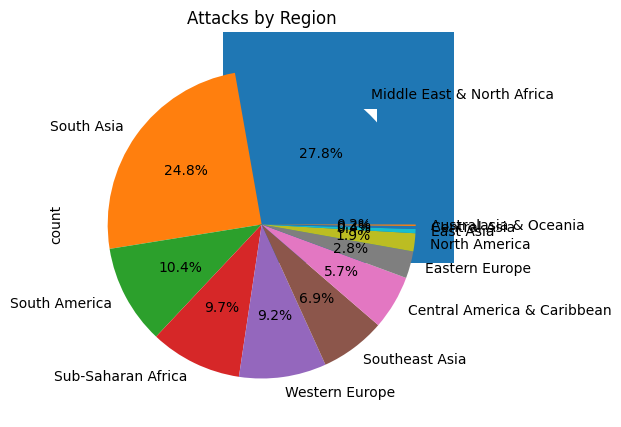

In [6]:
# Number of attacks by year
df['iyear'].value_counts().sort_index().plot(kind='bar', figsize=(15,5), title="Terrorist Attacks per Year")

# Top 10 terrorist groups
df['gname'].value_counts()[1:11].plot(kind='barh', title="Top 10 Terrorist Groups")

# Attacks by region
df['region_txt'].value_counts().plot(kind='pie', autopct='%1.1f%%', title="Attacks by Region")


In [7]:
# Select key columns
df = df[['iyear', 'imonth', 'iday', 'country_txt', 'region_txt',
         'provstate', 'city', 'attacktype1_txt', 'targtype1_txt',
         'weaptype1_txt', 'gname', 'nkill', 'nwound']]


In [8]:
# Rename columns
df.columns = ['Year', 'Month', 'Day', 'Country', 'Region', 'State', 'City',
              'AttackType', 'TargetType', 'WeaponType', 'Group', 'Killed', 'Wounded']

# Fill NaNs in Killed/Wounded
df['Killed'].fillna(0, inplace=True)
df['Wounded'].fillna(0, inplace=True)

# Create a new column: Total Casualties
df['Casualties'] = df['Killed'] + df['Wounded']

df.head()


/tmp/ipython-input-8-173811424.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Killed'].fillna(0, inplace=True)
/tmp/ipython-input-8-173811424.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.me

,Year,Month,Day,Country,Region,State,City,AttackType,TargetType,WeaponType,Group,Killed,Wounded,Casualties
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,Assassination,Private Citizens & Property,Unknown,MANO-D,1.0,0.0,1.0
1,1970,0,0,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),Unknown,23rd of September Communist League,0.0,0.0,0.0
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,Unknown,Unknown,1.0,0.0,1.0
3,1970,1,0,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),Explosives,Unknown,0.0,0.0,0.0
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Incendiary,Unknown,0.0,0.0,0.0


/tmp/ipython-input-9-4097248507.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Year', palette='mako')


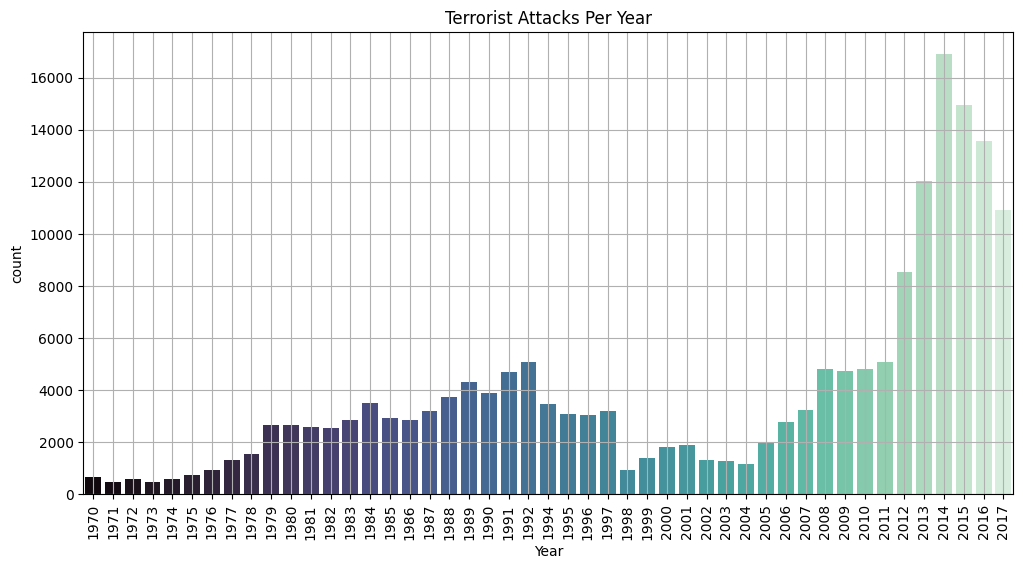

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Year', palette='mako')
plt.xticks(rotation=90)
plt.title("Terrorist Attacks Per Year")
plt.grid(True)
plt.show()


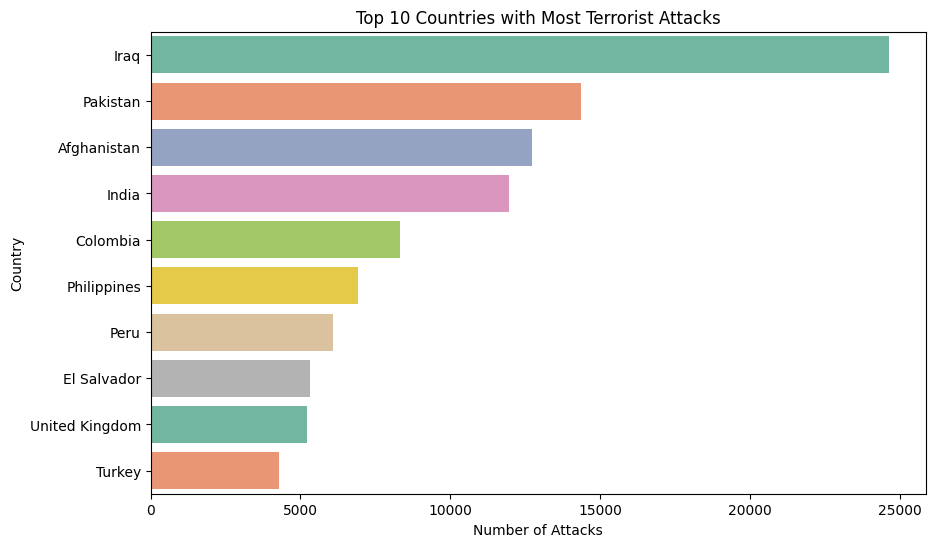

In [10]:
top_countries = df['Country'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(y=top_countries.index, x=top_countries.values, palette='Set2')
plt.title("Top 10 Countries with Most Terrorist Attacks")
plt.xlabel("Number of Attacks")
plt.ylabel("Country")
plt.show()


/tmp/ipython-input-11-3492111095.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='AttackType', order=df['AttackType'].value_counts().index, palette='cubehelix')


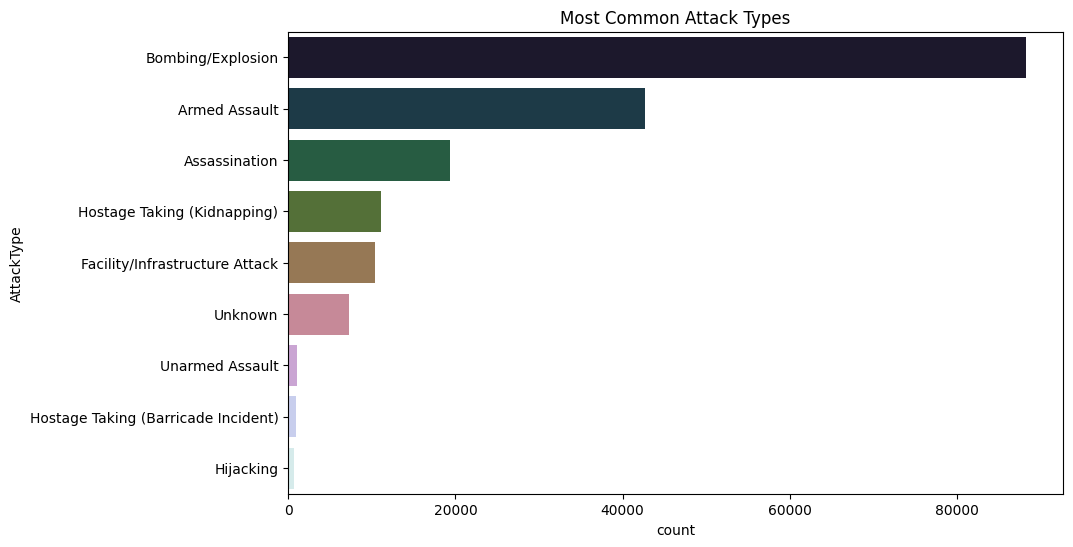

In [11]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, y='AttackType', order=df['AttackType'].value_counts().index, palette='cubehelix')
plt.title("Most Common Attack Types")
plt.show()
